In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from IPython.display import Image

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [4]:
df = pd.read_excel('6월세종시인구5.xlsx')

In [5]:
df.columns

Index(['Unnamed: 0', '행정구역', '2022년06월_총인구수', '한식 배달평균', '한식 배달 전년',
       '한식 배달 전월', '일일 평균 유동인구', '카페 월 최고매출', '카페 매출 전년대비', '카페 배달평균',
       '카페 배달 전년', '카페 업소', '카페 업소 전년', '중식 월 최고매출', '중식 매출 전년대비', '중식 배달평균',
       '치킨 배달평균', '치킨 업소', '상가수', '위도', '경도', '처리량', '군집', '공시지가'],
      dtype='object')

In [6]:
df['배달합'] = df['중식 배달평균'] + df['한식 배달평균'] + df['카페 배달평균'] + df['치킨 배달평균']

In [7]:
df = df[['2022년06월_총인구수','배달합','상가수','처리량']]

In [8]:
df

,2022년06월_총인구수,배달합,상가수,처리량
0,28701,1125,102,172480
1,34898,1045,443,279345
2,23269,1931,140,124710
3,34624,1202,147,91080
4,28192,2026,84,36000
5,42906,1644,816,104978
6,18370,1153,210,4515
7,21537,1317,89,49200
8,39243,1519,540,159425
9,18826,1492,257,61430


In [9]:
df_c = df
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
scaler = StandardScaler()
scaled=scaler.fit_transform(df_c)
df_c=pd.DataFrame(scaled)

In [10]:
df_c

,0,1,2,3
0,0.894693,-0.127084,-0.380718,0.870046
1,1.380257,-0.342772,1.425828,2.112158
2,0.469070,2.045971,-0.179402,0.314807
3,1.358788,0.080515,-0.142318,-0.076081
4,0.854811,2.302100,-0.476079,-0.716286
5,2.007722,1.272191,3.401903,0.085458
6,0.085211,-0.051594,0.191443,-1.082242
7,0.333360,0.390567,-0.449590,-0.562860
8,1.720708,0.935178,1.939713,0.718306
9,0.120940,0.862384,0.440439,-0.420709


In [11]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(df_c)

KMeans(n_clusters=4, random_state=0)

In [12]:
print(kmeans.labels_)

[2 1 2 2 2 1 2 2 1 2 3 0 3 3 3 3 3 3 3 3 3 2]


In [13]:
df_c['cluster'] = kmeans.labels_

In [14]:
df_c

,0,1,2,3,cluster
0,0.894693,-0.127084,-0.380718,0.870046,2
1,1.380257,-0.342772,1.425828,2.112158,1
2,0.469070,2.045971,-0.179402,0.314807,2
3,1.358788,0.080515,-0.142318,-0.076081,2
4,0.854811,2.302100,-0.476079,-0.716286,2
5,2.007722,1.272191,3.401903,0.085458,1
6,0.085211,-0.051594,0.191443,-1.082242,2
7,0.333360,0.390567,-0.449590,-0.562860,2
8,1.720708,0.935178,1.939713,0.718306,1
9,0.120940,0.862384,0.440439,-0.420709,2


In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(df_c)

type(transformed_pca)
transformed_pca.shape

df_c['pca_X'] = transformed_pca[:, 0]
df_c['pca_Y'] = transformed_pca[:, 1]

df_c.head()

,0,1,2,3,cluster,pca_X,pca_Y
0,0.894693,-0.127084,-0.380718,0.870046,2,0.622932,0.553298
1,1.380257,-0.342772,1.425828,2.112158,1,2.577316,1.760729
2,0.469070,2.045971,-0.179402,0.314807,2,1.091885,-1.097247
3,1.358788,0.080515,-0.142318,-0.076081,2,0.796833,-0.331647
4,0.854811,2.302100,-0.476079,-0.716286,2,0.933539,-2.064380


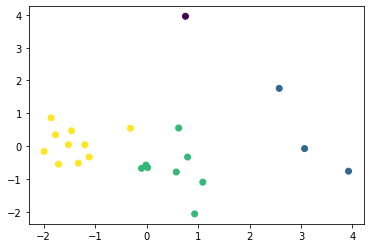

In [16]:
plt.scatter(x=df_c.loc[:, 'pca_X'], y=df_c.loc[:, 'pca_Y'], c=df_c['cluster'])

In [17]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score

In [18]:
df_c

,0,1,2,3,cluster,pca_X,pca_Y
0,0.894693,-0.127084,-0.380718,0.870046,2,0.622932,0.553298
1,1.380257,-0.342772,1.425828,2.112158,1,2.577316,1.760729
2,0.469070,2.045971,-0.179402,0.314807,2,1.091885,-1.097247
3,1.358788,0.080515,-0.142318,-0.076081,2,0.796833,-0.331647
4,0.854811,2.302100,-0.476079,-0.716286,2,0.933539,-2.064380
5,2.007722,1.272191,3.401903,0.085458,1,3.924383,-0.762389
6,0.085211,-0.051594,0.191443,-1.082242,2,-0.098017,-0.675405
7,0.333360,0.390567,-0.449590,-0.562860,2,0.020979,-0.652497
8,1.720708,0.935178,1.939713,0.718306,1,3.070151,-0.074139
9,0.120940,0.862384,0.440439,-0.420709,2,0.576816,-0.787321


In [19]:
coef_samples = silhouette_samples(df_c[[0,1,2,3]],df_c['cluster'])
# (150,)
coef_samples.shape

df_c['silhouette_coef'] = coef_samples
df_c

,0,1,2,3,cluster,pca_X,pca_Y,silhouette_coef
0,0.894693,-0.127084,-0.380718,0.870046,2,0.622932,0.553298,0.173227
1,1.380257,-0.342772,1.425828,2.112158,1,2.577316,1.760729,0.156081
2,0.469070,2.045971,-0.179402,0.314807,2,1.091885,-1.097247,0.374076
3,1.358788,0.080515,-0.142318,-0.076081,2,0.796833,-0.331647,0.361377
4,0.854811,2.302100,-0.476079,-0.716286,2,0.933539,-2.064380,0.380880
5,2.007722,1.272191,3.401903,0.085458,1,3.924383,-0.762389,0.393183
6,0.085211,-0.051594,0.191443,-1.082242,2,-0.098017,-0.675405,-0.039713
7,0.333360,0.390567,-0.449590,-0.562860,2,0.020979,-0.652497,0.263845
8,1.720708,0.935178,1.939713,0.718306,1,3.070151,-0.074139,0.365282
9,0.120940,0.862384,0.440439,-0.420709,2,0.576816,-0.787321,0.299425


In [20]:
# 평균 실루엣 계수 구하기
coef_avg = silhouette_score(df_c[[0,1,2,3]],df_c['cluster'])
print(f'iris data set 의 평균 silhouette 계수 : {coef_avg:.4f}')

iris data set 의 평균 silhouette 계수 : 0.3618


In [21]:
# 각 그룹별 silhouette 계수들의 평균
df_c.groupby('cluster')['silhouette_coef'].mean()

cluster
0    0.000000
1    0.304849
2    0.257889
3    0.498280
Name: silhouette_coef, dtype: float64

<AxesSubplot:>

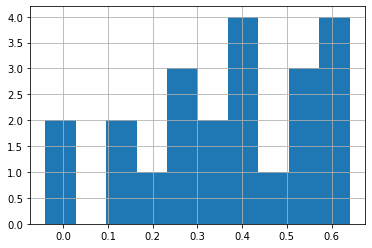

In [22]:
df_c['silhouette_coef'].hist()